In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import dataframe_image as dfi

In [2]:
df = pd.read_csv("data.csv")
df.drop(columns="result", inplace=True)
df.drop(columns="Time Utilization", inplace=True)
df = df.rename(columns={
    "int bits": "INT_WIDTH",
    "frac bits": "FRAC_WIDTH",
    "D": "d",
    "H": "h"
})

In [3]:
df_fail = df.copy()
df_fail = df_fail[df_fail["LUTs"] == 0]
df_fail = df_fail[["d", "h", "INT_WIDTH", "FRAC_WIDTH"]]

# Reset index and drop it to avoid showing index in the image
df_fail = df_fail.reset_index(drop=True)

# Style the dataframe to hide the index
styled_df = df_fail.style.hide(axis='index')

dfi.export(styled_df, "df_fail.png", table_conversion='chrome')

df_fail

,d,h,INT_WIDTH,FRAC_WIDTH
0,64,16,6,24
1,64,16,6,19
2,32,16,6,24
3,32,16,6,19
4,16,16,6,24
5,64,12,6,24
6,64,12,6,19
7,32,12,6,24
8,8,12,6,24
9,64,8,6,24


In [4]:
df = df[df["LUTs"] != 0]

chunk_size = 20  # number of rows per image

for i in range(0, len(df), chunk_size):
    chunk = df.iloc[i:i+chunk_size]
    dfi.export(chunk, f"df_chunk_{i}.png", table_conversion='chrome')

df

,LUTs,Registers,BRAMs,DSPs,WNS (ns),Total Power (W),Dynamic Power (W),Static Power (W),d,h,INT_WIDTH,FRAC_WIDTH,MAE,RMSE,Execution Time (m)
2,356963,640,0,3888,9.463,2.964,0.019,2.945,64,16,6,14,0.009261,0.013363,32.263611
3,95009,480,0,3888,9.291,2.961,0.016,2.945,64,16,6,9,0.009564,0.013729,18.589260
4,418852,320,0,0,9.221,2.950,0.005,2.944,64,16,6,4,0.089903,0.129848,18.572373
7,218944,640,0,2352,9.247,2.962,0.018,2.945,32,16,6,14,0.009434,0.013792,18.855132
8,59722,480,0,2352,9.365,2.959,0.014,2.945,32,16,6,9,0.009738,0.014050,12.050908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,11808,240,0,432,9.311,2.987,0.042,2.945,4,4,6,24,0.005595,0.008109,4.584516
121,6523,200,0,216,9.331,2.959,0.014,2.945,4,4,6,19,0.005595,0.008109,2.951785
122,11477,160,0,108,9.422,2.948,0.004,2.944,4,4,6,14,0.005600,0.008118,2.744606
123,3916,120,0,108,9.236,2.948,0.003,2.944,4,4,6,9,0.005932,0.008603,2.463717


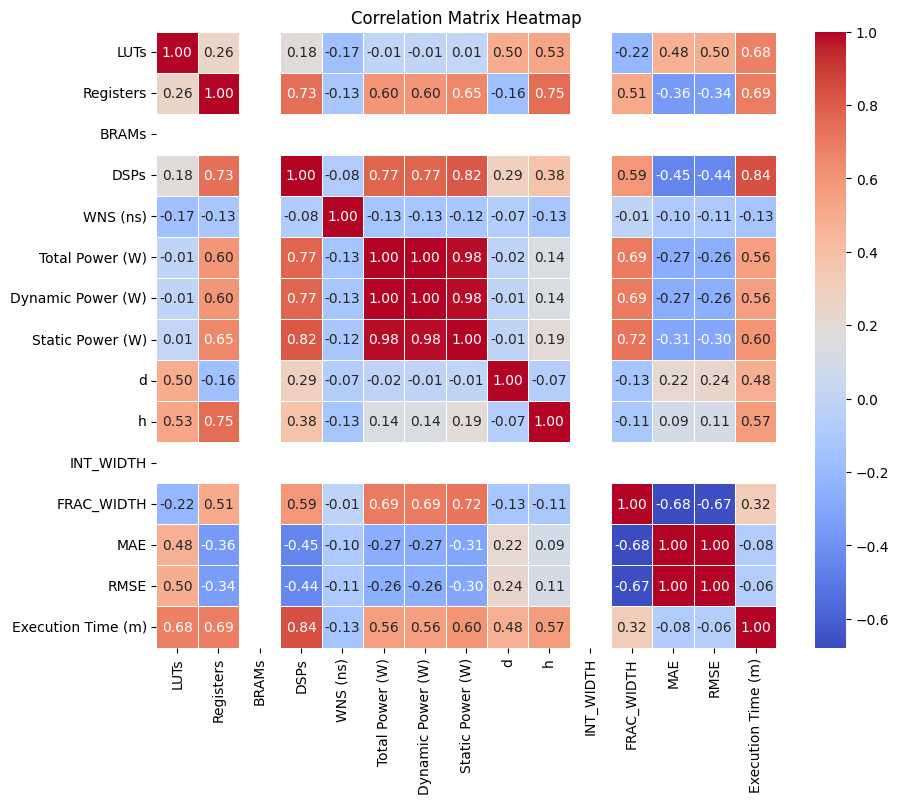

<Figure size 640x480 with 0 Axes>

In [5]:
corr = df.corr()

# Set up the plot
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(
    corr,
    annot=True,          # show correlation values
    fmt=".2f",           # format numbers
    cmap="coolwarm",     # color palette
    linewidths=0.5
)

plt.title("Correlation Matrix Heatmap")
plt.show()
plt.savefig("corr_matrix.png")

In [6]:
df.columns

Index(['LUTs', 'Registers', 'BRAMs', 'DSPs', 'WNS (ns)', 'Total Power (W)',
       'Dynamic Power (W)', 'Static Power (W)', 'd', 'h', 'INT_WIDTH',
       'FRAC_WIDTH', 'MAE', 'RMSE', 'Execution Time (m)'],
      dtype='object')

In [7]:
desc = df[['LUTs', 'Registers', 'BRAMs', 'DSPs', 'WNS (ns)', 'Total Power (W)',
           'Dynamic Power (W)', 'Static Power (W)', 'MAE', 'RMSE']].describe()
desc = desc.drop('count').round(2)

styled_desc = desc.style.format(precision=2)
dfi.export(styled_desc, "describe_output.png", table_conversion='chrome')
desc

,LUTs,Registers,BRAMs,DSPs,WNS (ns),Total Power (W),Dynamic Power (W),Static Power (W),MAE,RMSE
mean,65294.98,332.63,0.0,1072.84,9.29,3.00,0.05,2.95,0.02,0.03
std,70919.31,194.77,0.0,1143.91,0.15,0.09,0.09,0.00,0.03,0.04
min,3916.00,80.00,0.0,0.00,8.21,2.95,0.00,2.94,0.01,0.01
25%,20467.25,180.00,0.0,166.50,9.24,2.95,0.00,2.94,0.01,0.01
50%,41605.00,300.00,0.0,729.00,9.31,2.96,0.01,2.94,0.01,0.01
75%,80159.75,480.00,0.0,1620.00,9.38,3.00,0.06,2.94,0.01,0.01
max,418852.00,960.00,0.0,4800.00,9.49,3.38,0.42,2.95,0.10,0.15


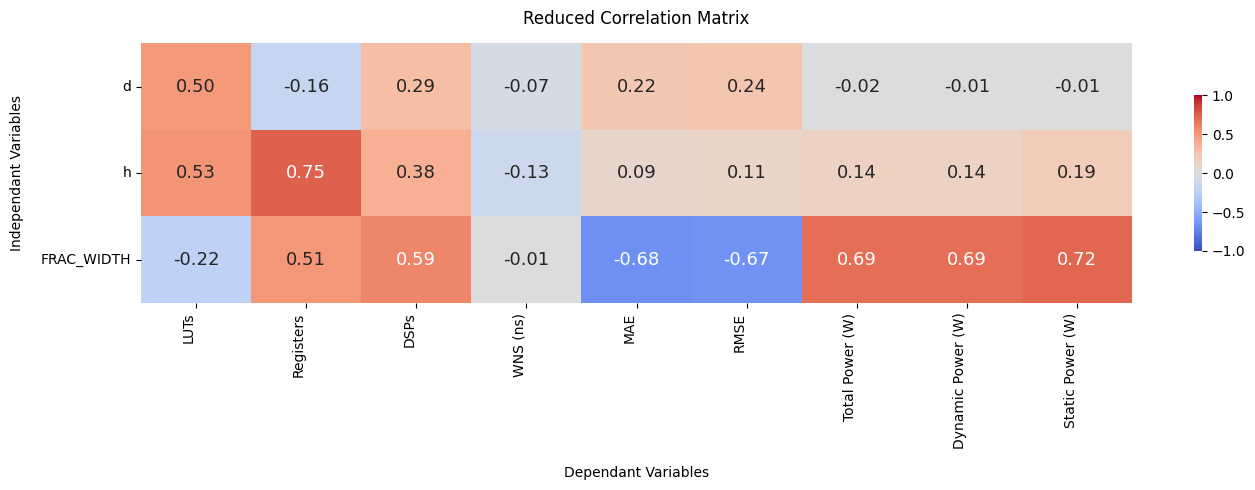

In [8]:
set_bottom = ['LUTs', 'Registers', 'DSPs', 'WNS (ns)', 'MAE', 'RMSE',
              'Total Power (W)', 'Dynamic Power (W)', 'Static Power (W)']
set_right = ['d', 'h', 'FRAC_WIDTH']

A = df[set_right].values
B = df[set_bottom].values

corr = np.corrcoef(A.T, B.T)
corr_mat = corr[:len(set_right), len(set_right):]

corr_df = pd.DataFrame(corr_mat, index=set_right, columns=set_bottom)

# Create figure and axes
fig, ax = plt.subplots(figsize=(14, 5))   # wider figure to fit long x-labels

# Plot heatmap
sns.heatmap(
    corr_df,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    ax=ax,
    cbar_kws={"shrink": 0.6},
    annot_kws={"fontsize": 13}              # reduce annotation font size if crowded
)

# Tweak tick labels so they don't get cut off
ax.set_xlabel("Dependant Variables", labelpad=12)
ax.set_ylabel("Independant Variables", labelpad=12)
ax.set_title("Reduced Correlation Matrix", pad=14)

# Rotate and right-align x tick labels (long names)
plt.xticks(rotation=90, ha="right")
plt.yticks(rotation=0)

# Optionally reduce x tick label font size if still crowded
for tick in ax.get_xticklabels():
    tick.set_fontsize(10)

# Tight layout and save without clipping
plt.tight_layout()
plt.savefig("reduced_corr_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

In [9]:
#sns.pairplot(df)

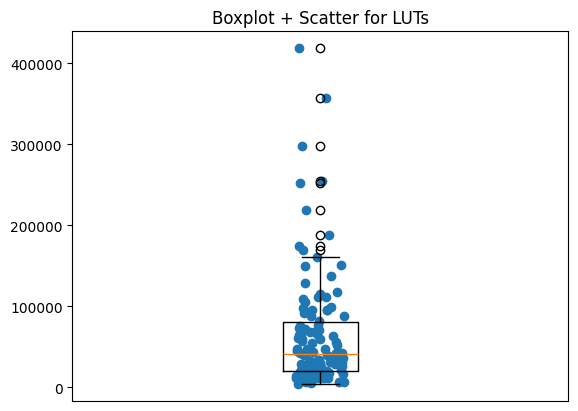

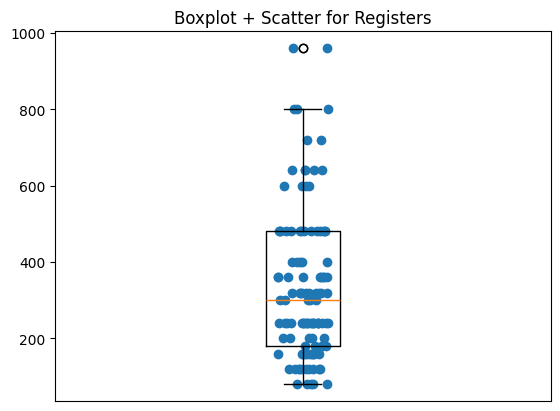

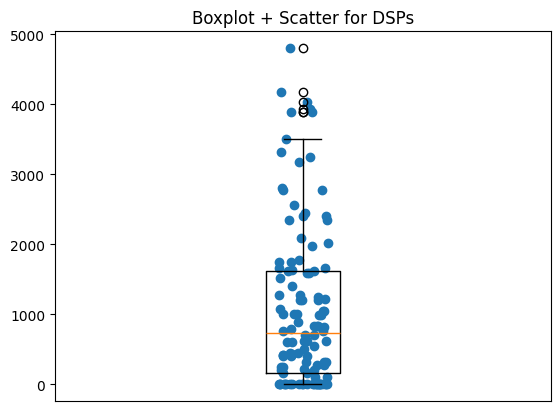

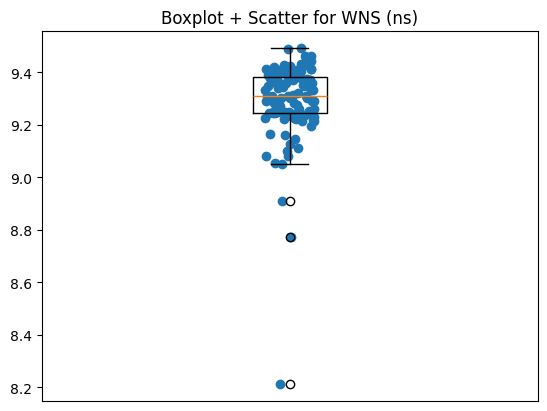

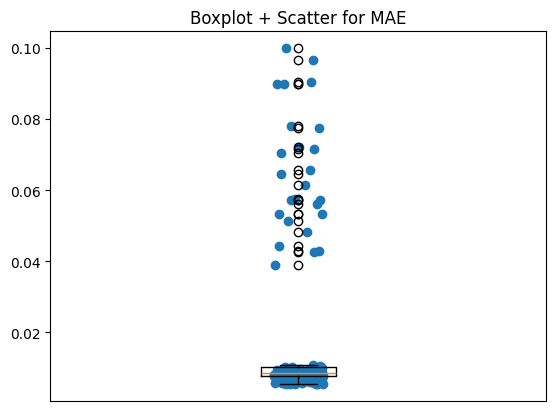

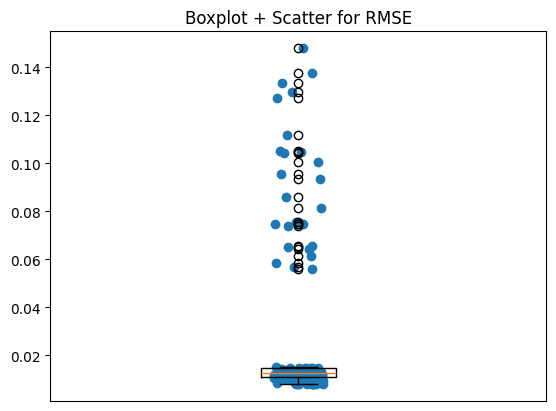

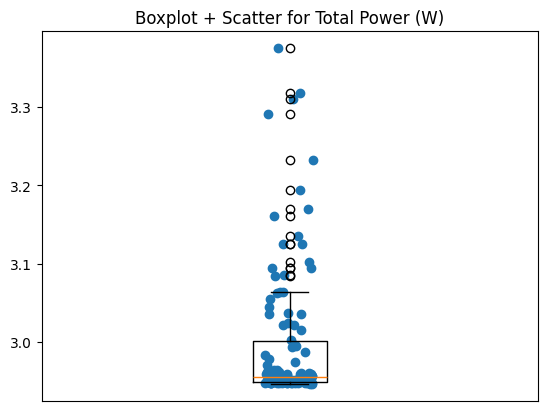

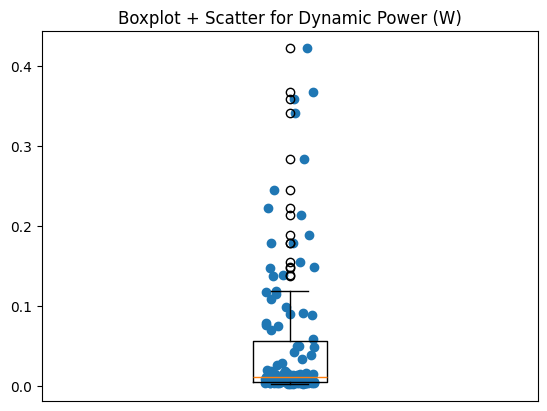

In [10]:
columns = ['LUTs', 'Registers', 'DSPs', 'WNS (ns)', 'MAE', 'RMSE',
              'Total Power (W)', 'Dynamic Power (W)']

for col in columns:
    data = df[col].dropna()

    fig, ax = plt.subplots()

    # Boxplot
    ax.boxplot(data, positions=[0])

    # Jitter scatter points so they don't overlap
    jitter = np.random.uniform(-0.05, 0.05, size=len(data))
    ax.scatter(jitter, data)

    # Clean axis labels
    ax.set_title(f"Boxplot + Scatter for {col}")
    ax.set_xticks([])

    plt.savefig(f"boxplot_{col}.png", dpi=300, bbox_inches="tight")

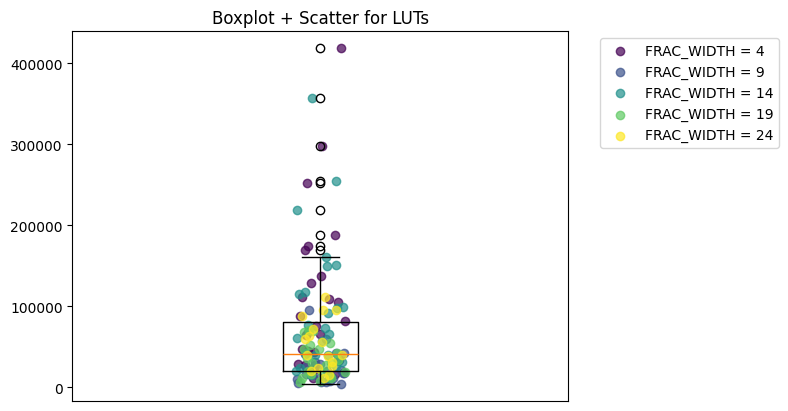

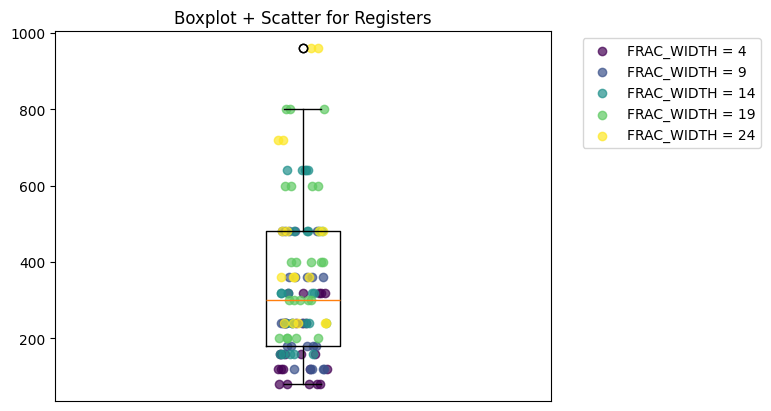

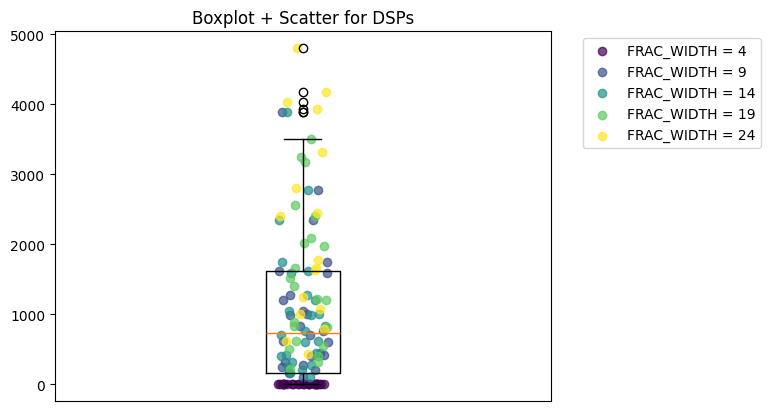

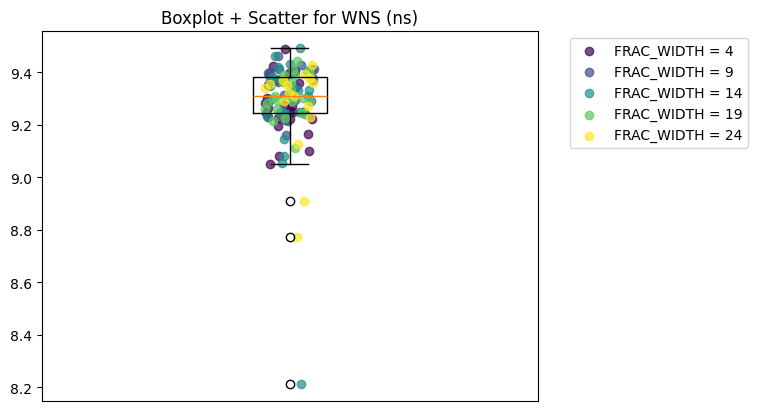

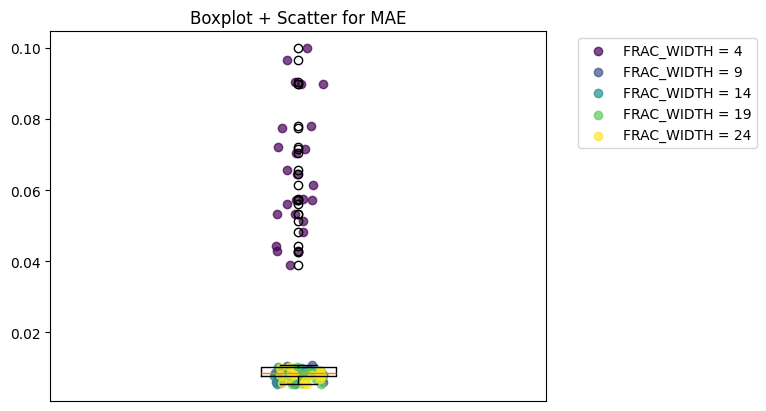

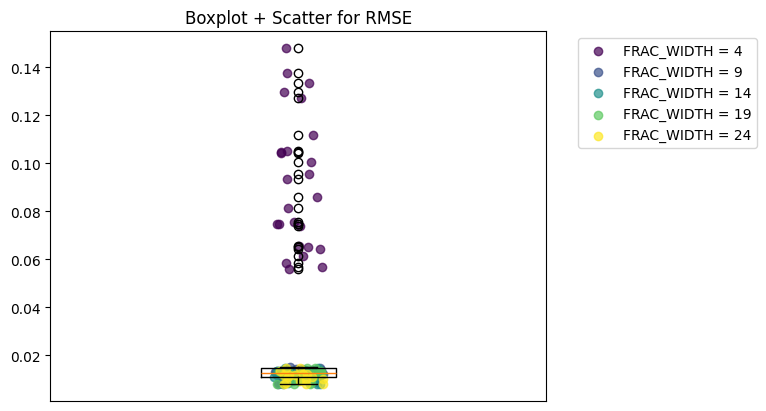

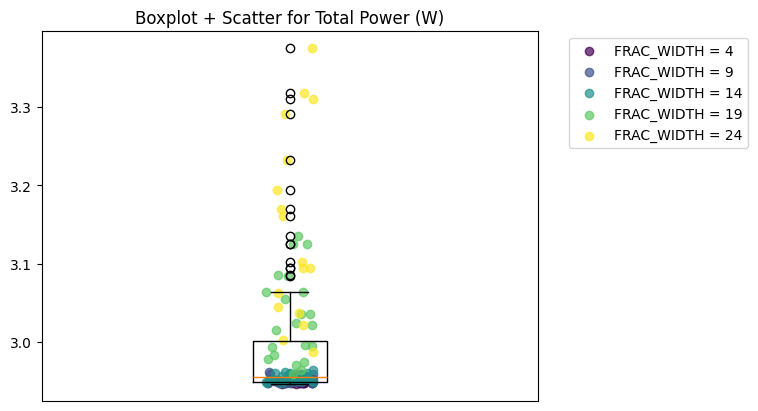

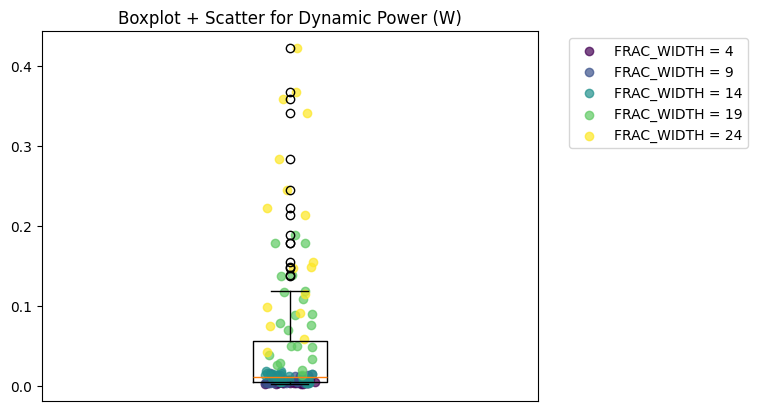

In [13]:
columns = ['LUTs', 'Registers', 'DSPs', 'WNS (ns)', 'MAE', 'RMSE',
           'Total Power (W)', 'Dynamic Power (W)']

# Get unique frac bits values and create a color map
unique_frac_bits = sorted(df['FRAC_WIDTH'].dropna().unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_frac_bits)))
color_map = dict(zip(unique_frac_bits, colors))

for col in columns:
    # Filter rows where both the column and 'frac bits' are non-null
    valid_data = df[[col, 'FRAC_WIDTH']].dropna()
    data = valid_data[col]
    
    fig, ax = plt.subplots()
    
    # Boxplot
    ax.boxplot(data, positions=[0])
    
    # Jitter scatter points colored by frac bits
    jitter = np.random.uniform(-0.05, 0.05, size=len(data))
    
    # Plot each frac bits group separately for legend
    for frac_bit_val in unique_frac_bits:
        mask = valid_data['FRAC_WIDTH'] == frac_bit_val
        if mask.any():
            ax.scatter(jitter[mask], data[mask], 
                      color=color_map[frac_bit_val],
                      label=f'FRAC_WIDTH = {frac_bit_val}',
                      alpha=0.7)
    
    # Clean axis labels and add legend
    ax.set_title(f"Boxplot + Scatter for {col}")
    ax.set_xticks([])
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.savefig(f"boxplot_colored_{col}.png", dpi=300, bbox_inches="tight")